In [1]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None


In [2]:
df = pd.read_csv("/home/memari/centering_majid/tables/device_usage_cleaned.csv", parse_dates=['date'])
col = df.columns

In [3]:
# find the first day
def find_first_day(device_id, df):
    df_target = df[df['device_id']==device_id]
    return min(df_target['date'])
def halve(df):
    first_day = {device_id:find_first_day(device_id, df) 
                 for device_id in set(df['device_id'].tolist())
                if find_first_day(device_id, df)>=datetime.date(year=2022,month=11,day=11)}
    df = df[df['device_id'].isin(first_day)]
    df['day'] = df.apply(lambda x: 1+(x['date']-first_day[x['device_id']]).days, axis = 1)
    df_1_14 = df[df['day']<=14]
    df_15_28 = df[(df['day']>14) & (df['day']<=28)]
    return df_1_14,df_15_28
df_1_14,df_15_28 = halve(df)

In [4]:
col = df.columns.tolist()
col.insert(0,'day')
print(col)

['day', 'device_id', 'date', 'elapsed_device_on', 'elapsed_device_off']


In [5]:
df_1_14 = df_1_14[col]
df_1_14

,day,device_id,date,elapsed_device_on,elapsed_device_off
0,1,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-19,2059.867325,9058.977986
1,2,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-20,5478.438835,79157.384791
2,3,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-21,7987.285942,80162.947736
3,4,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-22,9316.175104,77363.962594
4,5,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-23,13422.878653,73212.289174
...,...,...,...,...,...
2543,10,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-16,23323.592973,21201.946316
2544,11,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-17,14083.503607,22568.176560
2545,12,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-18,13710.176682,62743.144872
2546,13,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-19,22903.450387,27891.105334


In [6]:
df_15_28 = df_15_28[col]
df_15_28

,day,device_id,date,elapsed_device_on,elapsed_device_off
14,15,00e17b8a-4b0f-4230-bd26-3df2853e8916,2023-01-02,3642.335653,58987.637348
15,16,00e17b8a-4b0f-4230-bd26-3df2853e8916,2023-01-03,1805.953096,46574.276628
16,17,00e17b8a-4b0f-4230-bd26-3df2853e8916,2023-01-04,8737.993938,76426.060033
17,18,00e17b8a-4b0f-4230-bd26-3df2853e8916,2023-01-05,8219.730464,78364.705463
18,19,00e17b8a-4b0f-4230-bd26-3df2853e8916,2023-01-06,557.400159,5693.734940
...,...,...,...,...,...
2556,23,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-29,10918.917861,74248.107077
2557,24,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-30,11998.857603,63072.433905
2558,25,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-31,31610.016154,48664.681181
2559,26,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2023-01-01,8131.785642,73785.401312


In [7]:
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv',
                       skiprows=[1, 2])[['Study ID', 'Group']]
df_group.columns = ['survey_id', 'group']
df_id = pd.read_csv('/home/memari/centering_majid/tables/id.csv')
df_group = df_id.merge(df_group, on='survey_id', how='left')
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)

df_1_14 = df_1_14.merge(df_group[['device_id', 'group']],
                   on='device_id', how='left')
df_15_28 = df_15_28.merge(df_group[['device_id', 'group']],
                   on='device_id', how='left')


In [8]:
df_1_14

,day,device_id,date,elapsed_device_on,elapsed_device_off,group
0,1,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-19,2059.867325,9058.977986,Experimental Condition
1,2,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-20,5478.438835,79157.384791,Experimental Condition
2,3,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-21,7987.285942,80162.947736,Experimental Condition
3,4,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-22,9316.175104,77363.962594,Experimental Condition
4,5,00e17b8a-4b0f-4230-bd26-3df2853e8916,2022-12-23,13422.878653,73212.289174,Experimental Condition
...,...,...,...,...,...,...
983,10,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-16,23323.592973,21201.946316,Experimental Condition
984,11,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-17,14083.503607,22568.176560,Experimental Condition
985,12,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-18,13710.176682,62743.144872,Experimental Condition
986,13,ffe96eaa-8909-4958-a34e-0ed1fe68f9bd,2022-12-19,22903.450387,27891.105334,Experimental Condition


In [9]:
grouped_1_14 = df_1_14 .groupby(['group'])
df_dict = {group: data for group, data in grouped_1_14}
active_control_1_14 = df_dict['Active Control']
experimental_condition_1_14 = df_dict['Experimental Condition']
passive_control_1_14 = df_dict['Passive Control']

In [10]:
grouped_15_28 = df_15_28 .groupby(['group'])
df_dict = {group: data for group, data in grouped_15_28}
active_control_15_28 = df_dict['Active Control']
experimental_condition_15_28 = df_dict['Experimental Condition']
passive_control_15_28 = df_dict['Passive Control']

In [11]:
to_remove = ['day', 'device_id', 'date']
mylist = [item for item in col if item not in to_remove]


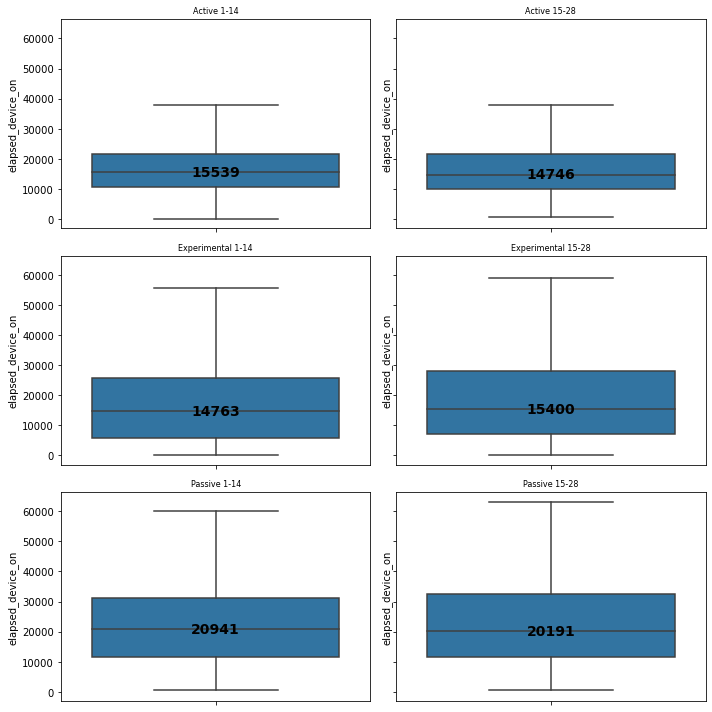

paired t-test for active_control before vs after intervention: t-statistic=-1.54 and p-value=0.12
paired t-test for experimental_condition before vs after intervention: t-statistic=-1.54 and p-value=0.19
paired t-test for passive_control before vs after intervention: t-statistic=-1.54 and p-value=0.46


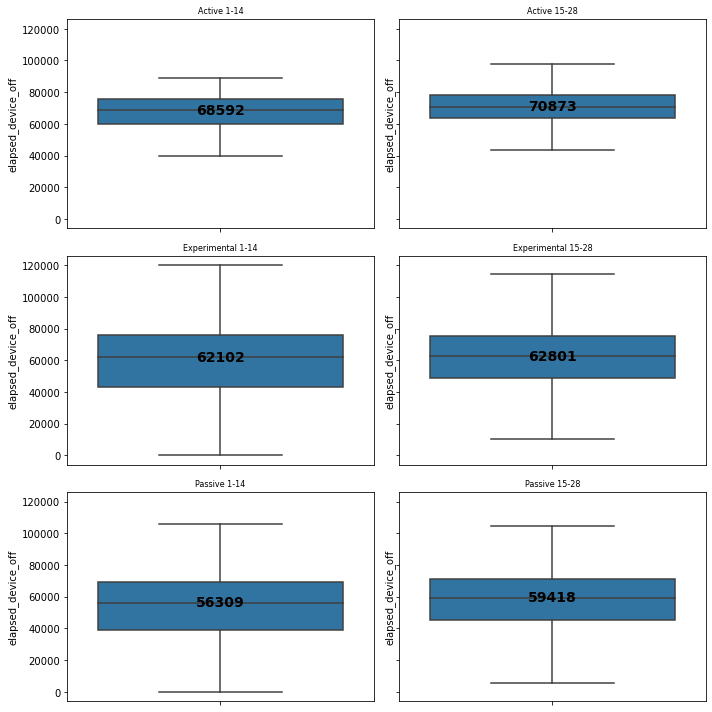

paired t-test for active_control before vs after intervention: t-statistic=-2.72 and p-value=0.01
paired t-test for experimental_condition before vs after intervention: t-statistic=-2.72 and p-value=0.04
paired t-test for passive_control before vs after intervention: t-statistic=-2.72 and p-value=0.01


In [12]:
for clm in mylist:
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10), sharey=True)
    sns.boxplot(y=active_control_1_14[clm], orient="v", showfliers=False, ax=ax1)
    sns.boxplot(y=active_control_15_28[clm], orient="v", showfliers=False, ax=ax2)
    sns.boxplot(y=experimental_condition_1_14[clm],orient="v", showfliers=False, ax=ax3)
    sns.boxplot(y=experimental_condition_15_28[clm],orient="v", showfliers=False, ax=ax4)
    sns.boxplot(y=passive_control_1_14[clm], orient="v", showfliers=False, ax=ax5)
    sns.boxplot(y=passive_control_15_28[clm], orient="v", showfliers=False, ax=ax6)

    ax1.set_title("Active 1-14", fontsize=8)
    m1 = int(active_control_1_14[clm].median())
    ax1.text(0, m1, m1, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax2.set_title("Active 15-28", fontsize=8)
    m2 = int(active_control_15_28[clm].median())
    ax2.text(0, m2, m2, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax3.set_title("Experimental 1-14", fontsize=8)
    m3 = int(experimental_condition_1_14[clm].median())
    ax3.text(0, m3, m3, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax4.set_title("Experimental 15-28", fontsize=8)
    m4 = int(experimental_condition_15_28[clm].median())
    ax4.text(0, m4, m4, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax5.set_title("Passive 1-14", fontsize=8)
    m5 = int(passive_control_1_14[clm].median())
    ax5.text(0, m5, m5, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    ax6.set_title("Passive 15-28", fontsize=8)
    m6 = int(passive_control_15_28[clm].median())
    ax6.text(0, m6, m6, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})

    plt.tight_layout()
    plt.show()

    t, p = stats.ttest_rel(active_control_1_14[clm].iloc[:200], active_control_15_28[clm].iloc[:200])
    print('paired t-test for active_control before vs after intervention: t-statistic={:.2f} and p-value={:.2f}'.format(t, p))
    stat, p = stats.ttest_rel(experimental_condition_1_14[clm].iloc[:200], experimental_condition_15_28[clm].iloc[:200])
    print('paired t-test for experimental_condition before vs after intervention: t-statistic={:.2f} and p-value={:.2f}'.format(t, p))
    stat, p = stats.ttest_rel(passive_control_1_14[clm].iloc[:200], passive_control_15_28[clm].iloc[:200])
    print('paired t-test for passive_control before vs after intervention: t-statistic={:.2f} and p-value={:.2f}'.format(t, p))